### Handling Age Missing values

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [300]:
pd.__version__

'2.2.0'

In [301]:
titanic_df = pd.read_csv("C:\\Users\\hp\\Downloads\\archive\\train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [270]:
titanic_df.at[796, "Name"] = 'Leader, dr. Alice (Farnham)' # Dealing with 'gender' of Doctors.

In [271]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [272]:
def get_initials(value):
    name = value.split(',')[1]
    initials = name.split('.')[0]
    return initials.strip()

Akternative of above code
```python
result = []
for each in titanic_df['Name']:
    result.append(
        get_initials(each)
    )

#### In short we can use `dataframe.apply()` method of Python to work on above matters

In [273]:
# Lets find out waht are the initials involve in our data.
titanic_df['Initials'] = titanic_df['Name'].apply(get_initials)

In [274]:
titanic_df["Initials"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'dr', 'Jonkheer'], dtype=object)

<Axes: xlabel='Initials'>

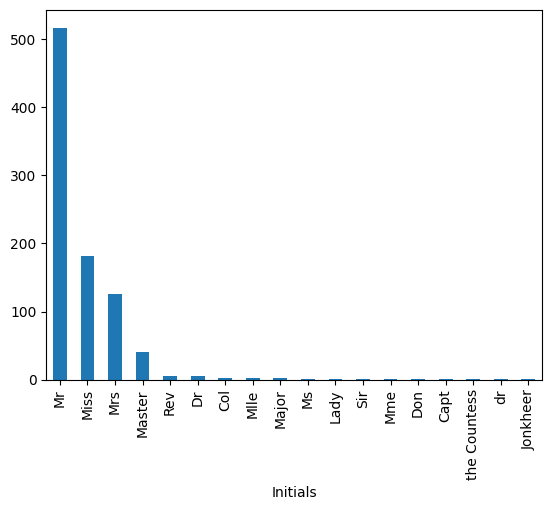

In [275]:
titanic_df["Initials"].value_counts().plot.bar()

In [276]:
titanic_df[titanic_df.Initials=="Dr"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.00,C78,Q,Dr
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.00,NaN,S,Dr
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.50,NaN,S,Dr
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.50,B50,C,Dr
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.65,NaN,S,Dr
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.60,NaN,C,Dr


In [277]:
# In doctor we find that one doctor is female. I dealt this by changing 1 female doctor initials 'Dr'with initials 'dr' 

In [278]:
titanic_df['Initials'].value_counts()

Initials
Mr              517
Miss            182
Mrs             125
Master           40
Rev               6
Dr                6
Col               2
Mlle              2
Major             2
Ms                1
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
dr                1
Jonkheer          1
Name: count, dtype: int64

#### `DataFrame.replace()`
From above thing we get how many initials are there in our datasets now we mix what can be similar to each other using `DataFrame.replace()`

In [279]:
titanic_df['Initials'].replace(to_replace={'Lady':'Miss', 'Sir':'Mr'}, inplace=True)
titanic_df['Initials'].unique()

C:\Users\hp\AppData\Local\Temp\ipykernel_11920\895840909.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Initials'].replace(to_replace={'Lady':'Miss', 'Sir':'Mr'}, inplace=True)


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Mlle', 'Col', 'Capt', 'the Countess', 'dr', 'Jonkheer'],
      dtype=object)

<Axes: xlabel='Initials'>

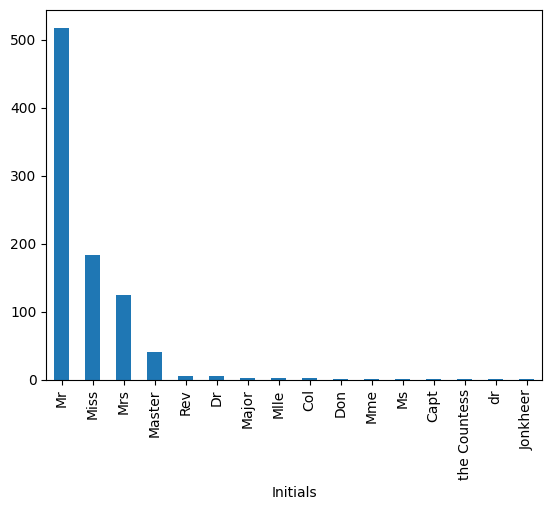

In [280]:
titanic_df['Initials'].value_counts().plot.bar()

In [281]:
titanic_df[titanic_df.Initials == 'Capt']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,Capt


In [282]:
titanic_df[titanic_df['Initials']=='dr']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
796,797,1,1,"Leader, dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,dr


In [283]:
titanic_df['Initials'].replace(
    to_replace={'Ms':'Miss', 'Capt':'Mr', 'Dr':'Mr', 'Col':'Mr', 'Mme':'Mrs', 
               'Don':'Mr', 'Rev':'Mr', 'Major':'Mr', 'Mlle':'Miss', 'the Countess':'Mrs', 
               'Jonkheer':'Master', 'dr':'Mrs'}, 
    inplace=True)

In [284]:
titanic_df['Initials'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

<Axes: xlabel='Initials'>

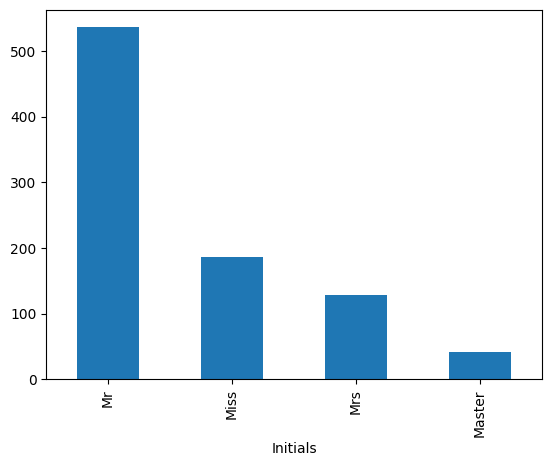

In [285]:
titanic_df['Initials'].value_counts().plot.bar()

In [286]:
titanic_df['Initials'].value_counts()

Initials
Mr        536
Miss      186
Mrs       128
Master     41
Name: count, dtype: int64

In [287]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [288]:
## groupby
titanic_df.groupby(by='Initials').size()

Initials
Master     41
Miss      186
Mr        536
Mrs       128
dtype: int64

In [289]:
titanic_df['Initials'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

<Axes: xlabel='Initials'>

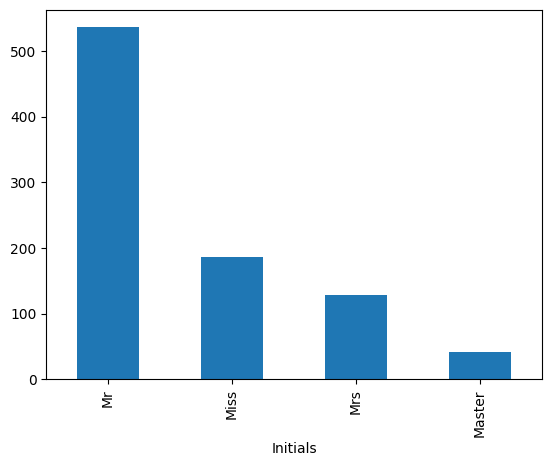

In [290]:
titanic_df['Initials'].value_counts().plot.bar()

In [291]:
## Using aggregate()
grouped = titanic_df.groupby(by='Initials')

In [292]:
grouped['Age'].agg(Nan=lambda x: x.isna().sum(), NoNaN=lambda x: x.notna().sum())

,Nan,NoNaN
Initials,,
Master,4,37
Miss,36,150
Mr,120,416
Mrs,17,111


In [293]:
grouped['Age'].agg(['mean','median'])

,mean,median
Initials,,
Master,5.477568,4.0
Miss,22.020000,21.5
Mr,32.972356,30.0
Mrs,35.882883,35.0


In [294]:
titanic_df.sample(10, random_state=11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S,Mrs
821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S,Mr
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,Mr
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q,Mr
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S,Mr
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S,Mr
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S,Mr
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C,Miss
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,NaN,S,Mr
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S,Mrs


In [295]:
median_age_by_initials_sex_Pclass = titanic_df.groupby(['Sex', 'Pclass', 'Initials'])['Age']
median_age_by_initials_sex_Pclass.median()

Sex     Pclass  Initials
female  1       Miss        30.0
                Mrs         40.0
        2       Miss        24.0
                Mrs         32.0
        3       Miss        18.0
                Mrs         31.0
male    1       Master       7.5
                Mr          42.0
        2       Master       1.0
                Mr          31.0
        3       Master       4.0
                Mr          26.0
Name: Age, dtype: float64

In [296]:
# inputing the values of Age 
# Using the groupby to transform this variables

titanic_df.loc[titanic_df.Age.isna(), 'Age'] = titanic_df.groupby(
    ['Sex', 'Pclass', 'Initials'])['Age'].transform('median')

In [297]:
titanic_df['Age'].isna().sum()

0

In the above dataframe, here I dealt with null value of `Age`. 

**How I deal with it?**

- To fill null value of age, **firstly** I define new column named `Initials` to make new column data with initials in every `Name`. While dealing with `Initials`, I found that in initial Doctor `Dr` there is category of male and female and I change the one female doctor's initials using `.iat` with initial `dr`. Because of which I could exactly find numbers of males and females in my DataFrame. 

- **Secondly**, Using `DataFrame.agg()`, I findout how many null values and filled up values are there in each initials. 

- **Thirdly**, I used `DataFrame.groupby()` to group the age in among Pclass, Sex and Initials and after doing this, I find out `median` age using Pclass between male and female with cooperation of Initials. 

- **Lastly**, after doing all this I implement it in my DataFrame to deal with null value in column `Age`.

In [303]:
titanic_df.sample(10, random_state=11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S
821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,NaN,S
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
